In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv('port_calls_prod_60_8.csv', encoding= ' cp1252')
df2 = pd.read_csv('Ship9794850.csv')

In [3]:
df

,ship_name,imo_number,mmsi,ship_status,ship_type,flag_name,entered,departed,latitude,longitude,speed,port_name,port_country_name,port_code,status,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
0,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2020-12-03T18:41:43Z,NaN,43.563351,7.078405,0.1,Juan-les-Pins,France,FRJLP,Moored,NaN,1143,61.27,3.29,10.98
1,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2020-12-03T14:40:15Z,2020-12-03T18:41:43Z,43.532131,7.123899,13.0,Antibes,France,FRANT,NaN,4.0,1143,61.27,3.29,10.98
2,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-30T08:38:49Z,2020-12-03T14:40:15Z,43.563324,7.078390,0.0,Juan-les-Pins,France,FRJLP,Moored,10326.0,1143,61.27,3.29,10.98
3,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-29T06:59:40Z,2019-09-30T08:38:49Z,43.528362,7.118890,15.0,Antibes,France,FRANT,NaN,25.7,1143,61.27,3.29,10.98
4,IL VAGABONDO,1001984,319574000.0,In Service/Commission,Yacht,Cayman Islands,2019-09-28T13:42:29Z,2019-09-29T06:59:40Z,43.730396,7.456732,0.1,Monaco,Monaco,MCMON,At anchor,17.3,1143,61.27,3.29,10.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941491,YI CHENG 18,9953016,413286590.0,In Service/Commission,Products Tanker,"China, People's Republic Of",2021-10-05T17:42:08Z,2021-10-06T05:59:03Z,29.939243,122.205666,0.0,Zhoushan,China,CNZOS,At anchor,12.3,8187,138.38,7.80,19.00
2941492,YI CHENG 18,9953016,413286590.0,In Service/Commission,Products Tanker,"China, People's Republic Of",2021-10-05T13:41:41Z,2021-10-06T04:21:11Z,30.007483,122.099517,NaN,Majistan/Zhoushan,China,CNMAJ,IHS,14.7,8187,138.38,7.80,19.00
2941493,YI CHENG 18,9953016,413286590.0,In Service/Commission,Products Tanker,"China, People's Republic Of",2021-10-05T13:41:06Z,2021-10-05T13:41:41Z,29.940598,122.202324,0.4,Zhoushan,China,CNZOS,NaN,0.0,8187,138.38,7.80,19.00
2941494,YI CHENG 18,9953016,413286590.0,In Service/Commission,Products Tanker,"China, People's Republic Of",2021-09-30T13:21:39Z,2021-10-02T00:41:30Z,21.700000,108.600000,NaN,Qinzhou,China,CNQZH,IHS,35.3,8187,138.38,7.80,19.00


In [4]:
df2.head()

,timestamp,mmsi,latitude,longitude,speed,course,heading,draught,destination,status,collection_type
0,2022-10-10 01:34:21.8 UTC,636018764,19.980405,119.877287,13.5,223,219,8.5,JPKSM > AEFJR,15,dynamic
1,2022-10-10 02:09:01 UTC,636018764,19.885000,119.785000,13.0,222,219,8.5,JPKSM > AEFJR,0,satellite
2,2022-10-10 02:12:01 UTC,636018764,19.876667,119.778333,13.0,221,219,8.5,JPKSM > AEFJR,0,satellite
3,2022-10-10 02:41:36.55 UTC,636018764,19.798242,119.700982,13.1,223,225,8.5,JPKSM > AEFJR,15,dynamic
4,2022-10-10 02:52:16.27 UTC,636018764,19.770292,119.673700,12.6,224,225,8.5,JPKSM > AEFJR,15,dynamic


In [5]:
df.isnull().sum()

ship_name                   0
imo_number                  0
mmsi                    12078
ship_status                 0
ship_type                   0
flag_name                   0
entered                     0
departed                 2142
latitude                    0
longitude                   0
speed                 1167131
port_name                   0
port_country_name           0
port_code                   0
status                1143713
hours_in_port            2142
gross_tonnage               0
length_overall_loa          0
draught                     0
breadth                     0
dtype: int64

In [6]:
df.describe()

,imo_number,mmsi,latitude,longitude,speed,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
count,2.941496e+06,2.929418e+06,2.941496e+06,2.941496e+06,1.774365e+06,2.939354e+06,2.941496e+06,2.941496e+06,2.941496e+06,2.941496e+06
mean,9.401637e+06,4.243636e+08,2.800831e+01,3.549785e+01,5.257617e+00,2.885239e+01,3.834638e+04,1.972992e+02,1.082371e+01,2.996526e+01
std,3.828121e+05,1.549212e+08,2.127797e+01,7.302316e+01,5.504000e+00,1.053171e+02,4.023909e+04,7.757210e+01,3.701561e+00,1.091222e+01
min,1.001984e+06,2.050820e+08,-5.608052e+01,-1.765236e+02,0.000000e+00,-7.762800e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.980000e+00
25%,9.294408e+06,2.558064e+08,1.293186e+01,8.364072e-01,0.000000e+00,4.100000e+00,9.924000e+03,1.410000e+02,8.200000e+00,2.250000e+01
50%,9.407419e+06,4.415670e+08,3.139425e+01,2.889313e+01,3.600000e+00,1.100000e+01,2.682700e+04,1.833100e+02,1.100000e+01,3.000000e+01
75%,9.619452e+06,5.634060e+08,4.224537e+01,1.039524e+02,1.000000e+01,2.810000e+01,4.954900e+04,2.489600e+02,1.350000e+01,3.280000e+01
max,9.953016e+06,7.600021e+08,7.899817e+01,1.794478e+02,9.840000e+01,2.286140e+04,2.365830e+05,4.000000e+02,2.303500e+01,1.054000e+02


In [7]:
df.hours_in_port.mean()

28.852387735525248

### We have got the mean of hours in port 28.85 hours; however, we have noticed above that we have some values in negative as well so we have two options either we will try to fix it or we will exclude it. Let's try both the methods. 

Excluding the negative values

In [8]:
df_hours_exclude_negative = df[df['hours_in_port'] >= 0]
df_hours_exclude_negative.describe()

,imo_number,mmsi,latitude,longitude,speed,hours_in_port,gross_tonnage,length_overall_loa,draught,breadth
count,2.904458e+06,2.892479e+06,2.904458e+06,2.904458e+06,1.743632e+06,2.904458e+06,2.904458e+06,2.904458e+06,2.904458e+06,2.904458e+06
mean,9.401600e+06,4.243960e+08,2.801206e+01,3.555662e+01,5.297079e+00,2.957912e+01,3.835308e+04,1.973160e+02,1.082393e+01,2.996611e+01
std,3.824388e+05,1.549600e+08,2.128493e+01,7.299674e+01,5.505348e+00,1.049795e+02,4.025099e+04,7.757302e+01,3.701742e+00,1.091394e+01
min,1.001984e+06,2.050820e+08,-5.608052e+01,-1.765236e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.980000e+00
25%,9.294408e+06,2.558064e+08,1.294066e+01,8.828760e-01,1.000000e-01,4.100000e+00,9.924000e+03,1.410000e+02,8.200000e+00,2.250000e+01
50%,9.407419e+06,4.415670e+08,3.139858e+01,2.889398e+01,3.800000e+00,1.140000e+01,2.680900e+04,1.833100e+02,1.100000e+01,3.000000e+01
75%,9.619440e+06,5.634070e+08,4.224621e+01,1.039536e+02,1.000000e+01,2.840000e+01,4.954900e+04,2.489600e+02,1.350000e+01,3.280000e+01
max,9.953016e+06,7.600021e+08,7.899817e+01,1.794478e+02,9.840000e+01,2.286140e+04,2.365830e+05,4.000000e+02,2.303500e+01,1.054000e+02


In [9]:
df_hours_exclude_negative.hours_in_port.mean()

29.579118720241194

In [10]:
(len(df[df['hours_in_port'] <= 0]) / len(df))* 100

2.0232561934471436

We will re-evaluate again by trying fixing it. Noticing that the hours are getting calulated by (departed-entered), assuming that some of the enteries were recorded in the wrong order(departed insted of entered and vice versa) so for them we will do (entered-departed).

Ideal scenerio should be dropping the values if they are not correct as it is just 2% of our data. However, we will still try to see how are these values will impact our mean if we try fixing it

In [11]:
df_hours_exclude_negative.columns

Index(['ship_name', 'imo_number', 'mmsi', 'ship_status', 'ship_type',
       'flag_name', 'entered', 'departed', 'latitude', 'longitude', 'speed',
       'port_name', 'port_country_name', 'port_code', 'status',
       'hours_in_port', 'gross_tonnage', 'length_overall_loa', 'draught',
       'breadth'],
      dtype='object')

We have 

In [12]:
df.port_name.value_counts()[:10]

Singapore Offshore Terminals    75574
Tanjong Pagar                   34613
Antwerp                         27369
Hook of Holland                 25910
Pulau Sebarok                   24058
Nipah                           23706
Shanghai                        23514
Telok Ramunia                   22846
Hong Kong                       21920
Tanjung Langsat                 21752
Name: port_name, dtype: int64

<AxesSubplot:>

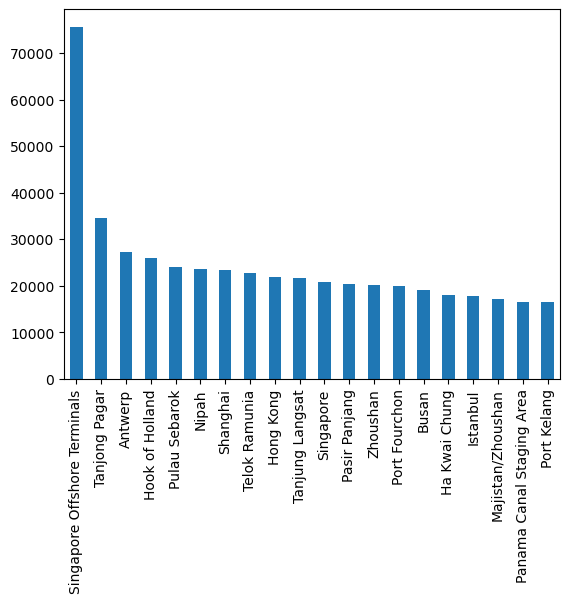

In [13]:
df.port_name.value_counts()[:20].plot(kind='bar', x='port_name')

We can see that the from the bar chart the most visited port is Singapore Offshore Terminals.

In [14]:
us_ports = df[df['port_country_name'] == 'United States of America'].groupby('port_country_name')['hours_in_port'].agg(['mean', 'max', 'min'])

# Print the results
print(us_ports)

                               mean      max     min
port_country_name                                   
United States of America  36.211294  15582.2 -7762.8


# Removing Outliers

### Z-Score

In [15]:
def remove_outliers_zscore(df, col_name, threshold=3):
    mean = df[col_name].mean()
    std = df[col_name].std()
    df['z_score'] = (df[col_name] - mean) / std
    return df[df['z_score'].abs() <= threshold].drop('z_score', axis=1)

In [16]:
df_z_score = remove_outliers_zscore(df, 'hours_in_port')


In [17]:
print(100 - ((len(df_z_score)/len(df))*100),'% of values removed from the data')
print(len(df) - len(df_z_score), 'values were removed')

0.7781074664048475 % of values removed from the data
22888 values were removed


### Interquartile Range (IQR) Method:


In [18]:
def remove_outliers_iqr(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col_name] >= lower) & (df[col_name] <= upper)]

In [19]:
df_iqr = remove_outliers_iqr(df, 'hours_in_port')


In [20]:
print(100 - ((len(df_iqr)/len(df))*100),'% of values removed from the data')
print(len(df) - len(df_iqr), 'values were removed')

9.959897956685978 % of values removed from the data
292970 values were removed


In [21]:
m = folium.Map(location=[0, 0], zoom_start=2)


In [ ]:

# Iterate over the port visit data and add markers for each port visit
for index, row in df.iterrows():
    # Check that the row has latitude and longitude values
    if pd.notna(row['latitude']) and pd.notna(row['longitude']):
        # Add a marker for the port visit
        tooltip = f"{row['ship_name']} visited {row['port_name']} in {row['port_country_name']} on {row['entered']}"
        folium.Marker(location=[row['latitude'], row['longitude']], tooltip=tooltip).add_to(m)

# Display the map
m

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the map boundaries
lllon = -180 # lower left longitude
lllat = -60  # lower left latitude
urlon = 180 # upper right longitude
urlat = 80  # upper right latitude

# Create a new map
m = Basemap(projection='cyl', resolution='c',
            llcrnrlon=lllon, llcrnrlat=lllat,
            urcrnrlon=urlon, urcrnrlat=urlat)

# Add some features to the map
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')
m.drawmapboundary(fill_color='white')

# Plot the port locations
lats = [33.75, 51.51, 1.29]  # example latitudes
lons = [-84.39, -0.13, 103.85]  # example longitudes
x, y = m(lons, lats)
m.plot(x, y, 'bo', markersize=5)

# Show the map
plt.show()


In [ ]:
import plotly.graph_objs as go

# Create a scattergeo trace
trace = go.Scattergeo(
    lon = df['longitude'],
    lat = df['latitude'],
    text = df['port_name'],
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.8,
        reversescale = True,
        autocolorscale = False,
        symbol = 'circle',
        line = dict(
            width=1,
            color='rgba(102, 102, 102)'
        ),
        colorscale = 'Blues',
        cmin = 0,
        color = df['hours_in_port'],
        cmax = df['hours_in_port'].max(),
        colorbar_title="Hours in Port"
    )
)

# Create a layout with title and a dark background
layout = go.Layout(
    title = go.layout.Title(
        text = 'Port Entry Data',
        x = 0.5,
        font = dict(size=30)
    ),
    geo = go.layout.Geo(
        scope='world',
        projection_type='miller',
        showland = True,
        landcolor = 'rgb(217, 217, 217)',
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
    ),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
)

# Create the figure object and plot it
fig = go.Figure(data=[trace], layout=layout)
fig.show()
